# **Business Problem**
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

# **Netflix Dataset**
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

The dataset consists of a list of all the TV shows/movies available on Netflix:



*   Show_id: Unique ID for every Movie / Tv Show
*   Type: Identifier - A Movie or TV Show
*   Title: Title of the Movie / Tv Show
*   Director: Director of the Movie
*   Cast: Actors involved in the movie/show
*   Country: Country where the movie/show was produced
*   Date_added: Date it was added on Netflix
*   Release_year: Actual Release year of the movie/show
*   Rating: TV Rating of the movie/show
*   Duration: Total Duration - in minutes or number of seasons
*   Listed_in: Genre
*   Description: The summary description


# **1. Importing Libraries , Loading the data and Basic Observations**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('netflix.csv')

To Check the netflix dataset top 5 rows

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


 Observations on the dataset

In [ ]:
df.shape

(8807, 12)

The actual size of the dataset is total 8807 rows and 12 columns.

The Metadata and the datatypes of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Statistical Summary Before Data Cleaning

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Only single column having numerical values. It gives idea of release year of the content ranges between what timeframe. Rest all the columns are having categorical data.

In [ ]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


# **2. Data Cleaning**

In [ ]:
df.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

From the data we could see that there are NULL values in the columns as mentioned,         
1.   Director
2.   Cast
3.   Country
4.   Date_added
5.   Rating
6.   Duration





Overall null values in each column of the dataset -

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


* The 3 missing values are found in duration column, and it is also found that those data got entered in rating column




In [ ]:
ind = df[df['duration'].isna()].index

In [ ]:
df.loc[ind] = df.loc[ind].fillna(method = 'ffill' , axis = 1)

In [ ]:
df.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


The Duration column has been filled with the correct data from rating column

In [ ]:
df.loc[ind ,'rating'] = 'Not Available'

Replaced the wrong entries in the rating column

In [ ]:
df.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...


Filling the NULL Values in the rating column

In [ ]:
df[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
indices = df[df.rating.isna()].index
df.loc[indices , 'rating'] = 'Not Available'

In [ ]:
df.loc[indices]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Dropping the NULL Values from the date_added column

In [ ]:
df.drop(df.loc[df['date_added'].isna()].index , axis = 0 , inplace = True)

In [ ]:
df['date_added'].value_counts()


January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

Converting the date_added column data type from object to datetime

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

In [ ]:
df['year_added'] = df['date_added'].dt.year

In [ ]:
df['month_added'] = df['date_added'].dt.month

In [ ]:
df[['date_added' , 'year_added' , 'month_added']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_added   8797 non-null   datetime64[ns]
 1   year_added   8797 non-null   int64         
 2   month_added  8797 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 274.9 KB


Total null values in each column


In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

# **3. Data Exploration and Non Graphical Analysis**


In [ ]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']


In [ ]:
movies.duration.value_counts()

90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

We could see that on average duration of movies are 90min

In [ ]:
tv_shows.duration.value_counts()

1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

And the TV shows have average of 1 Season

In [ ]:
timeperiod = pd.Series((df['date_added'].min().strftime('%B %Y') , df['date_added'].max().strftime('%B %Y')))
timeperiod.index = ['first' , 'Most Recent']
timeperiod

first            January 2008
Most Recent    September 2021
dtype: object

The First Movie added in Netflix was January 2008 and the Most Recent Movie was added on September 2021

In [ ]:
df.release_year.min() , df.release_year.max()

(1925, 2021)

The oldest movie/TV show released was on 1925 and the most recent movie/TV show released on the Netflix was 2021

In [ ]:
df.groupby(['type' , 'rating'])['show_id'].count()

type     rating       
Movie    G                  41
         NC-17               3
         NR                 75
         Not Available       5
         PG                287
         PG-13             490
         R                 797
         TV-14            1427
         TV-G              126
         TV-MA            2062
         TV-PG             540
         TV-Y              131
         TV-Y7             139
         TV-Y7-FV            5
         UR                  3
TV Show  NR                  4
         Not Available       2
         R                   2
         TV-14             730
         TV-G               94
         TV-MA            1143
         TV-PG             321
         TV-Y              175
         TV-Y7             194
         TV-Y7-FV            1
Name: show_id, dtype: int64

Above data shows the different ratings available on Netflix in each type of content

***Working on the columns having maximum null values and the columns having comma separated multiple values for each record***

In [ ]:
df['country'].value_counts()

United States                             2812
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

We see that many movies are produced in more than 1 country. Hence, the country column has comma separated values of countries.

This makes it difficult to analyse how many movies were produced in each country. We can use explode/melt function in pandas to split the country column into different rows.

In [ ]:
country_tb = df[['show_id' , 'type' , 'country']]
country_tb.dropna(inplace = True)
country_tb['country'] = country_tb['country'].apply(lambda x : x.split(','))
country_tb = country_tb.explode('country')
country_tb

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
country_tb['country'] = country_tb['country'].str.strip()
country_tb.loc[country_tb['country'] == '']

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [ ]:
country_tb = country_tb.loc[country_tb['country'] != '']

In [ ]:
country_tb['country'].nunique()

122

Netflix has movies from the total 122 countries.

Total movies and tv shows in each country

In [ ]:
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

There are some movies which are directed by multiple directors. Hence multiple names of directors are given in comma separated format. We will explode the director column as well. It will create many duplicate records in original table hence we created separate table for directors.

In [ ]:
dir_tb = df[['show_id' , 'type' , 'director']]
dir_tb.dropna(inplace = True)
dir_tb['director'] = dir_tb['director'].apply(lambda x : x.split(','))
dir_tb

,show_id,type,director
0,s1,Movie,[Kirsten Johnson]
2,s3,TV Show,[Julien Leclercq]
5,s6,TV Show,[Mike Flanagan]
6,s7,Movie,"[Robert Cullen, José Luis Ucha]"
7,s8,Movie,[Haile Gerima]
...,...,...,...
8801,s8802,Movie,[Majid Al Ansari]
8802,s8803,Movie,[David Fincher]
8804,s8805,Movie,[Ruben Fleischer]
8805,s8806,Movie,[Peter Hewitt]


In [ ]:
dir_tb = dir_tb.explode('director')

In [ ]:
dir_tb['director'] = dir_tb['director'].str.strip()

In [ ]:
dir_tb['director'].nunique()

4993

There are total 4993 unique directors in the dataset.

Total movies and tv shows directed by each director

In [ ]:
genre_tb = df[['show_id' , 'type', 'listed_in']]

In [ ]:
genre_tb['listed_in'] = genre_tb['listed_in'].apply(lambda x : x.split(','))
genre_tb = genre_tb.explode('listed_in')
genre_tb['listed_in'] = genre_tb['listed_in'].str.strip()

In [ ]:
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [ ]:
genre_tb.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
genre_tb.listed_in.nunique()

42

Total 42 genres present in dataset

In [ ]:
df.merge(genre_tb , on = 'show_id' ).groupby(['type_y'])['listed_in_y'].nunique()

type_y
Movie      20
TV Show    22
Name: listed_in_y, dtype: int64

Movies have 20 genres and TV shows have 22 genres.

In [ ]:
x = genre_tb.groupby(['listed_in' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'listed_in' , columns = 'type' , values = 'show_id').sort_index()

type,Movie,TV Show
listed_in,,
Action & Adventure,859.0,NaN
Anime Features,71.0,NaN
Anime Series,NaN,175.0
British TV Shows,NaN,252.0
Children & Family Movies,641.0,NaN
Classic & Cult TV,NaN,26.0
Classic Movies,116.0,NaN
Comedies,1674.0,NaN
Crime TV Shows,NaN,469.0


Total movies/TV shows in each genre

***Exploring the CAST Column***

In [ ]:
cast_tb = df[['show_id' , 'type' ,'cast']]
cast_tb.dropna(inplace = True)
cast_tb['cast'] = cast_tb['cast'].apply(lambda x : x.split(','))
cast_tb = cast_tb.explode('cast')
cast_tb

,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [ ]:
cast_tb['cast'] = cast_tb['cast'].str.strip()

In [ ]:
cast_tb.cast.nunique()

36403

Total actors on the Netflix

In [ ]:
x = cast_tb.groupby(['cast' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False)

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Junichi Suwabe,4.0,17.0
Daisuke Ono,5.0,17.0
Ai Kayano,2.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN


Total movies/TV shows by each actor

# **4. Visual Analysis - Univariate & Bivariate**

4.1. Distribution of content across the different types

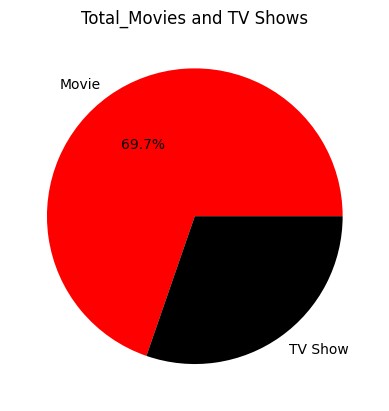

In [ ]:
types = df.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['red' , 'black'])
plt.title('Total_Movies and TV Shows')
plt.show()

4.2 Distribution of 'date_added' column

How has the number of movies/TV shows added on Netflix per year changed over the time?

In [ ]:
d = df.groupby(['date_added' ,'type' ])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)

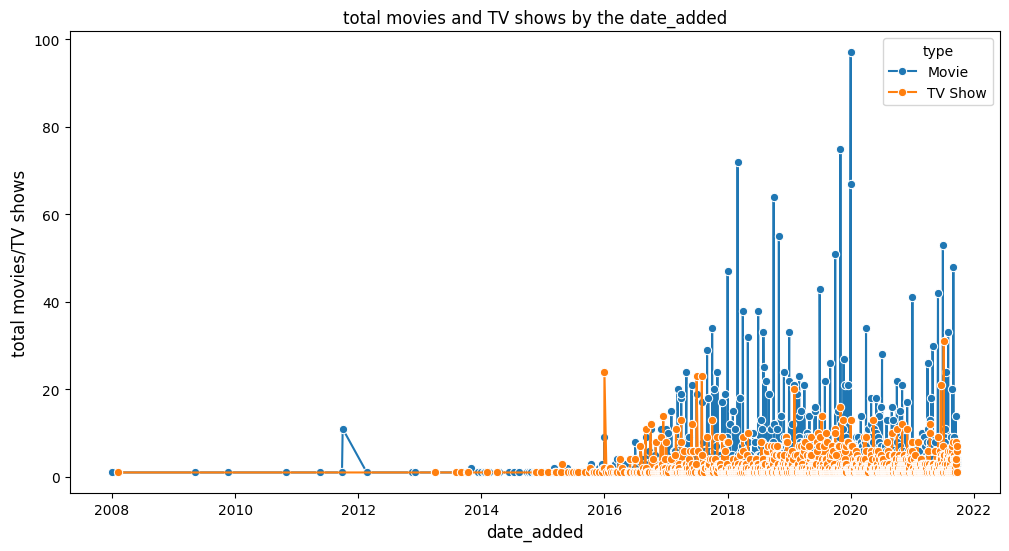

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'date_added' , y = 'total movies/TV shows' , hue = 'type', marker = 'o'  , ms = 6)
plt.xlabel('date_added' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the date_added' , fontsize = 12)
plt.show()

4.3 Distribution of 'Release_year' column

How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
d = df.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)
d

,type,release_year,total movies/TV shows
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,379
116,TV Show,2019,397
117,TV Show,2020,436


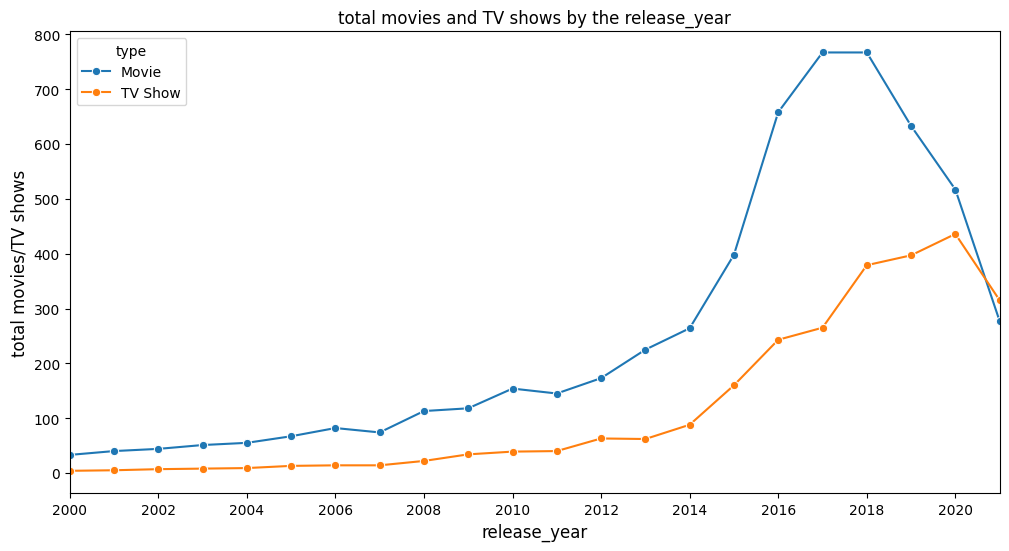

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'release_year' , y = 'total movies/TV shows' , hue = 'type' , marker = 'o'  , ms = 6 )
plt.xlabel('release_year' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the release_year' , fontsize = 12)
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(2000 , 2021 , 2))
plt.show()

4.4 Total movies/TV shows by each director

In [ ]:
top_10_dir = dir_tb.director.value_counts().head(10).index
df_new = dir_tb.loc[dir_tb['director'].isin(top_10_dir)]
df_new.reset_index()

,index,show_id,type,director
0,406,s407,Movie,Rajiv Chilaka
1,407,s408,Movie,Rajiv Chilaka
2,408,s409,Movie,Rajiv Chilaka
3,409,s410,Movie,Rajiv Chilaka
4,410,s411,Movie,Rajiv Chilaka
...,...,...,...,...
153,7513,s7514,Movie,Suhas Kadav
154,7820,s7821,Movie,Martin Scorsese
155,8272,s8273,Movie,Martin Scorsese
156,8735,s8736,Movie,Martin Scorsese


Total movies directed by top 10 directors

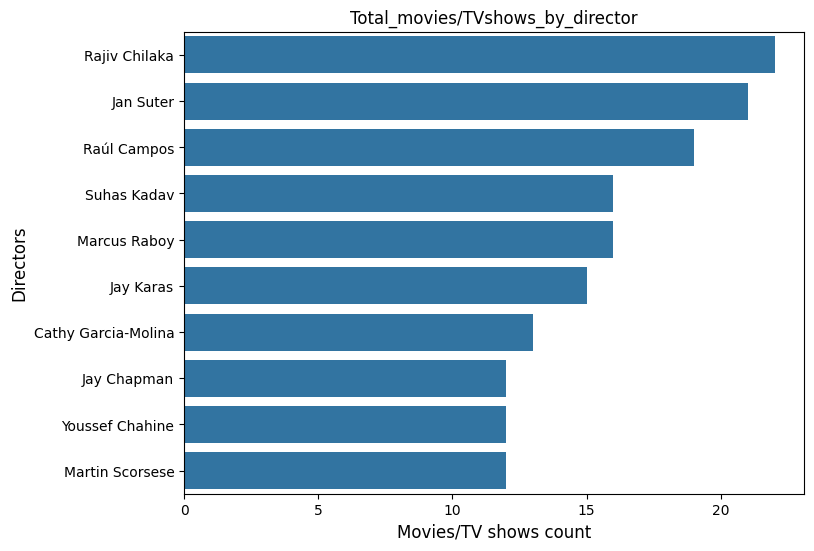

In [ ]:
plt.figure(figsize= (8 , 6))
sns.countplot(data = df_new , y = 'director' , order = top_10_dir , orient = 'v')
plt.xlabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Total_movies/TVshows_by_director')
plt.show()

The top 3 directors on Netflix in terms of count of movies directed by them are - Rajiv Chilaka, Jan Suter, Raúl Campos

4.4 Checking Outliers for number of movies directed by each director

In [ ]:
x = dir_tb.director.value_counts()
x

Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: director, Length: 4993, dtype: int64

4.5 Total movies/TV shows by each country

In [ ]:
top_10_country = country_tb.country.value_counts().head(10).index
df_new = country_tb.loc[country_tb['country'].isin(top_10_country)]

To check for top 10 countries

In [ ]:
x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752,932
India,962,84
United Kingdom,534,271
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,198
Mexico,111,58


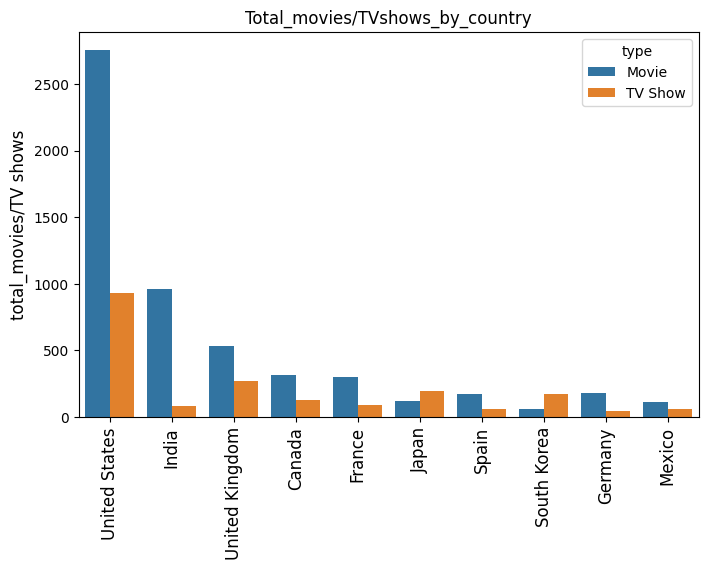

In [ ]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

In [ ]:
top_10_country = country_tb.country.value_counts().head(10).index
country_tb['cat'] = country_tb['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

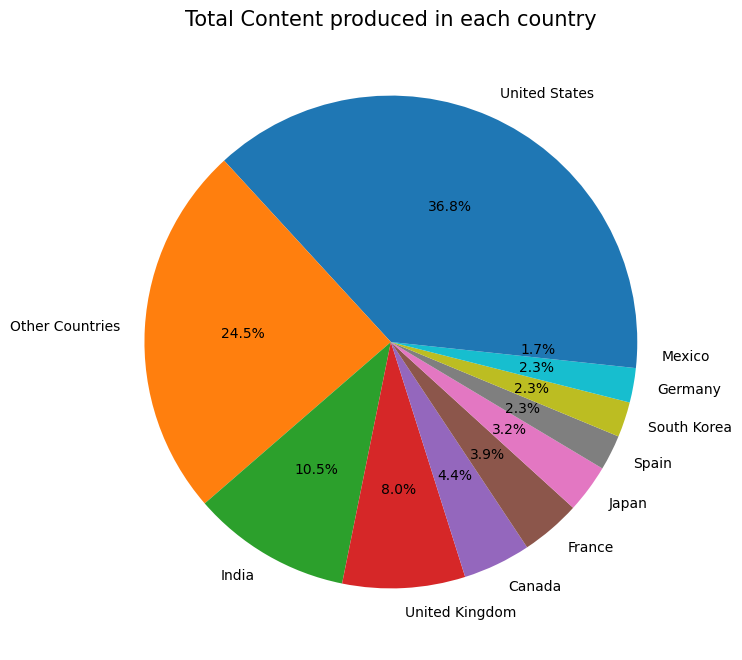

In [ ]:
x = country_tb.cat.value_counts()

plt.figure(figsize = (8,8))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

United States is the HIGHEST contributor country on Netflix, followed by India and United Kingdom.
Maximum content of Netflix which is around 75% , is coming from these top 10 countries. Rest of the world only contributes 25% of the content.

4.6 Total movies/TV shows distribution by rating of the content

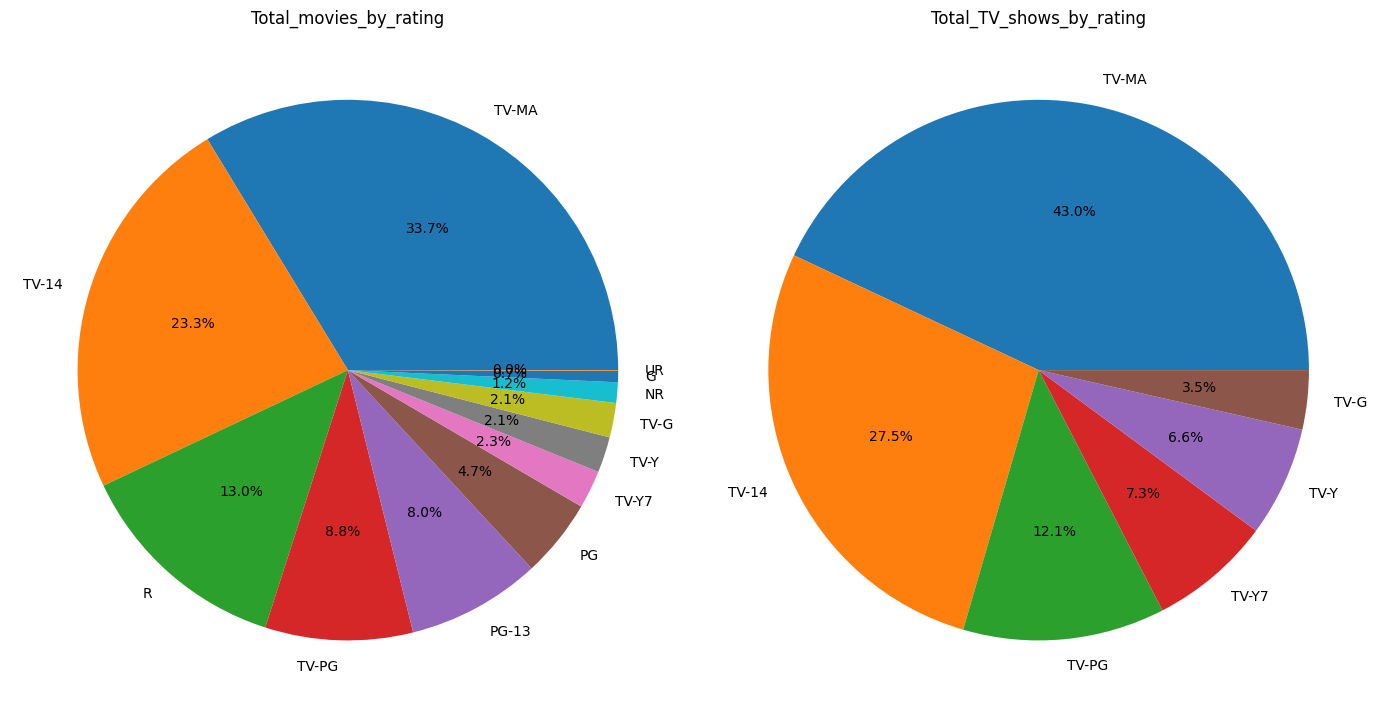

In [ ]:
m = movies.loc[~movies.rating.isin(['Not Available' , 'NC-17' , 'TV-Y7-FV'])]
m = m.rating.value_counts()
t = tv_shows.loc[~tv_shows.rating.isin(['Not Available' , 'R' , 'NR', 'TV-Y7-FV'])]
t = t.rating.value_counts()


fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].pie(m , labels = m.index, autopct='%1.1f%%')
ax[0].set_title('Total_movies_by_rating')

ax[1].pie(t , labels = t.index, autopct='%1.1f%%')
ax[1].set_title('Total_TV_shows_by_rating')

plt.tight_layout()
plt.show()


Highest number of movies and TV shows are rated TV-MA (for mature audiences), followed by TV-14 & R/TV-PG

4.7 Total movies/TV shows in each Genre

In [ ]:
top_10_movie_genres = genre_tb[genre_tb['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genre_tb.loc[genre_tb['listed_in'].isin(top_10_movie_genres)]

In [ ]:
top_10_TV_genres = genre_tb[genre_tb['type'] == 'TV Show'].listed_in.value_counts().head(10).index
df_tv = genre_tb.loc[genre_tb['listed_in'].isin(top_10_TV_genres)]

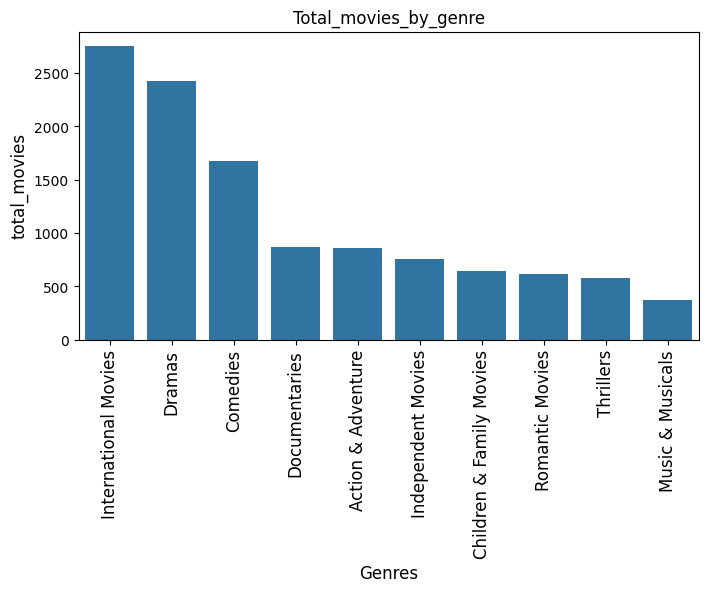

In [ ]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

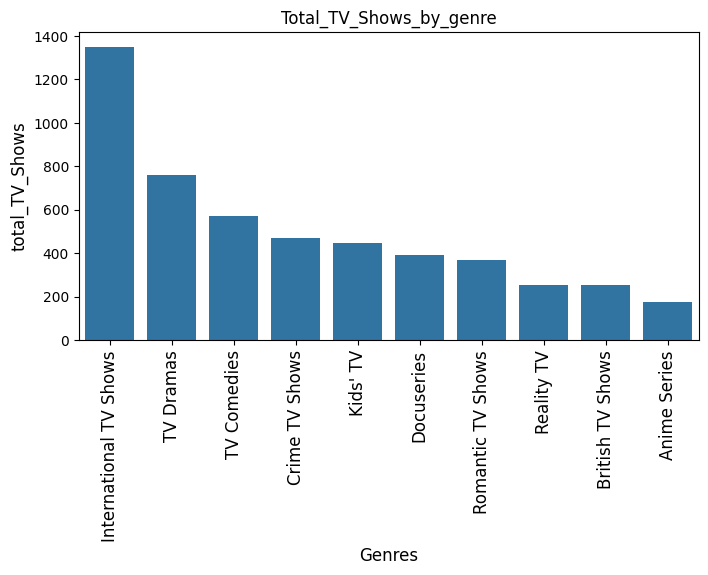

In [ ]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_TV_Shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_TV_Shows_by_genre')
plt.show()

International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

# **5. Bivariate Analysis**

5.1 Lets check popular genres in top 20 countries

In [ ]:
top_20_country = country_tb.country.value_counts().head(20).index
top_20_country = country_tb.loc[country_tb['country'].isin(top_20_country)]

In [ ]:
x = top_20_country.merge(genre_tb , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Genres')

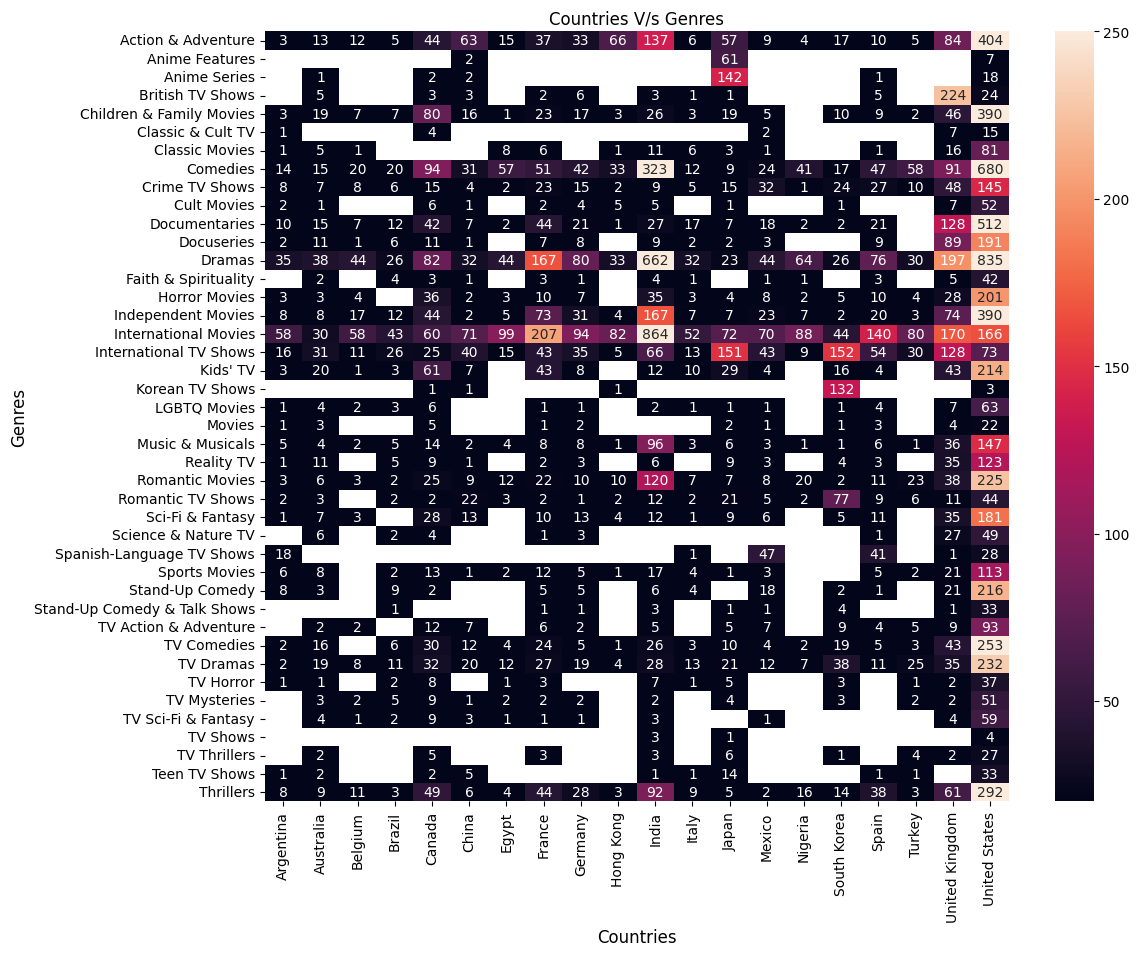

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 12)

Popular genres across countries: Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers
United States and UK have a good mix of almost all genres.
Maximum International movies are produced in India.

5.2 Country-wise Rating of Content

In [ ]:
x = top_20_country.merge(df , on = 'show_id').groupby(['country_x' , 'rating'])['show_id'].count().reset_index()

In [ ]:
country_rating = x.pivot(index = ['country_x'] , columns = 'rating' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Rating')

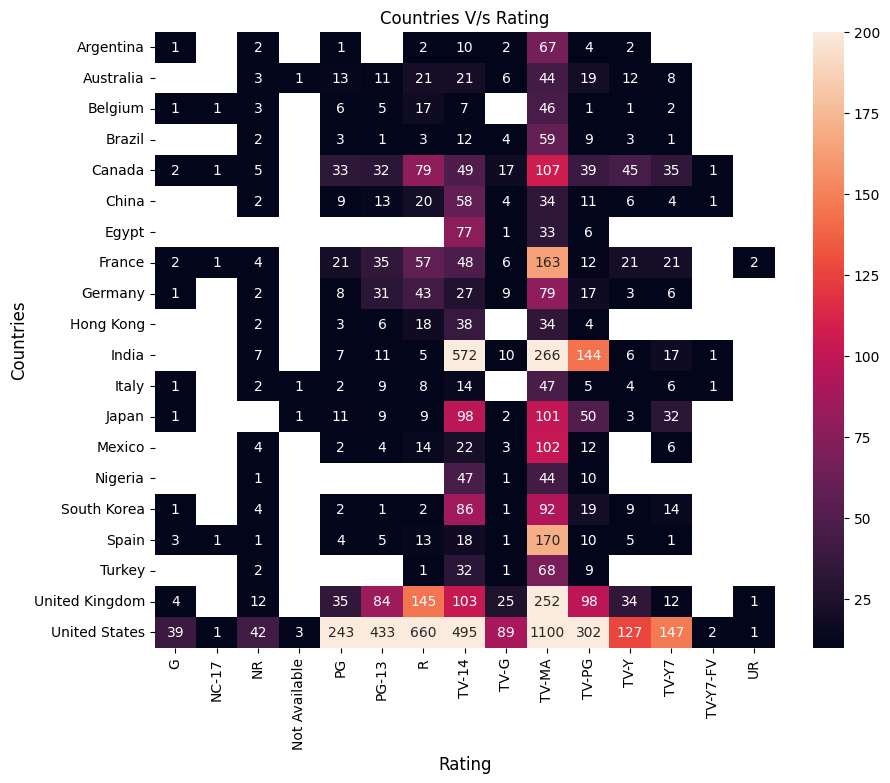

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)

*   Overall, Netflix has an large amount of adult content across all countries (TV-MA & TV-14).
*   India also has many titles rated TV-PG, other than TV-MA & TV-14.
*   Only US, Canada, UK, France and Japan have content for young audiences (TV-Y & TV-Y7).





5.3 The top actors by country

In [ ]:
x = cast_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'cast'])['show_id'].count().reset_index()
x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

,country,cast,show_id
49405,United States,Tara Strong,22
48330,United States,Samuel L. Jackson,22
40463,United States,Fred Tatasciore,21
35733,United States,Adam Sandler,20
41672,United States,James Franco,19


In [ ]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

In [ ]:
for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)

In [ ]:
top_5_actors

,country,cast,show_id
0,United States,Tara Strong,22
1,United States,Samuel L. Jackson,22
2,United States,Fred Tatasciore,21
3,United States,Adam Sandler,20
4,United States,James Franco,19
5,India,Anupam Kher,40
6,India,Shah Rukh Khan,34
7,India,Naseeruddin Shah,31
8,India,Om Puri,29
9,India,Akshay Kumar,29


top 5 actors in top countries and their movies/tv shows count

<Axes: xlabel='show_id', ylabel='cast'>

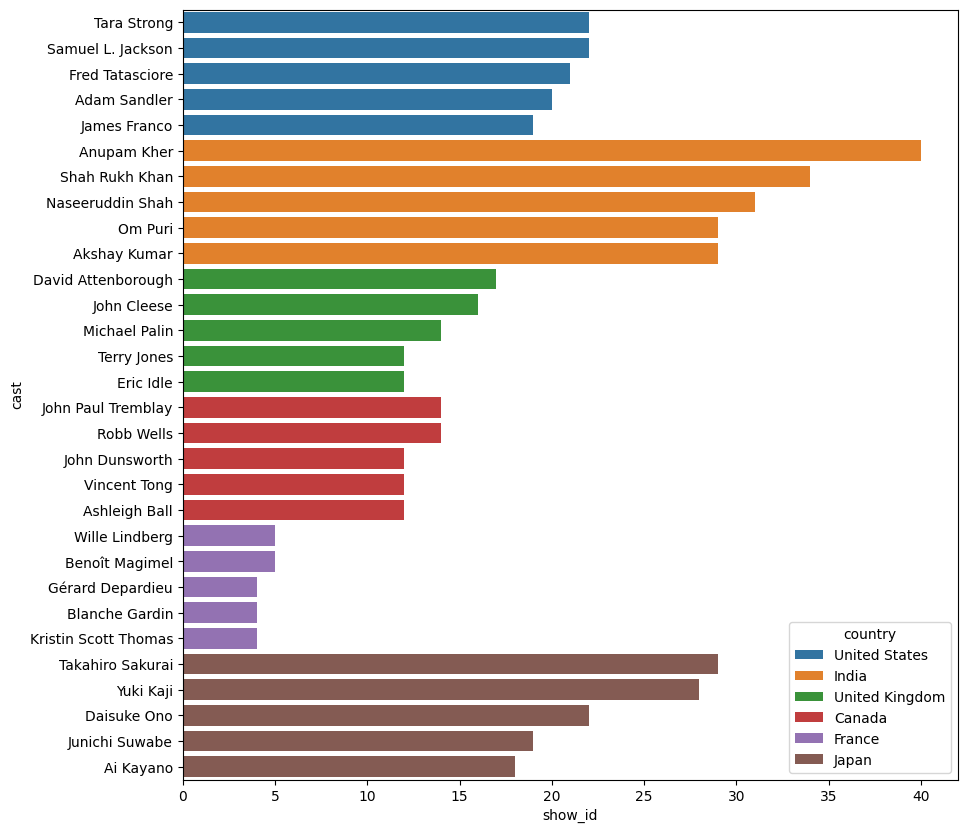

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(data = top_5_actors , y = 'cast' , x = 'show_id' , hue = 'country')

5.4 Top 5 directors by Genre

In [ ]:
genre_list = [ 'Children & Family Movies', 'Comedies','Dramas', 'International Movies', 'Documentaries' ,
              'International TV Shows', 'Sci-Fi & Fantasy', 'Thrillers', 'Horror Movies']

x = dir_tb.merge(genre_tb , on = 'show_id').groupby([ 'listed_in' , 'director',])['show_id'].count().reset_index()

top_5_dir = x.loc[x['listed_in'] == 'Action & Adventure'].sort_values('show_id' , ascending = False).head()

for i in genre_list:
    new = x.loc[x['listed_in'] == i].sort_values('show_id' , ascending = False).head()
    top_5_dir = pd.concat([top_5_dir , new])

top_5_dir

,listed_in,director,show_id
147,Action & Adventure,Don Michael Paul,9
550,Action & Adventure,S.S. Rajamouli,7
651,Action & Adventure,Toshiya Shinohara,7
215,Action & Adventure,Hidenori Inoue,7
606,Action & Adventure,Steven Spielberg,5
1215,Children & Family Movies,Rajiv Chilaka,22
1303,Children & Family Movies,Suhas Kadav,16
1211,Children & Family Movies,Prakash Satam,7
1241,Children & Family Movies,Robert Rodriguez,7
1288,Children & Family Movies,Steve Ball,6


5.5 Top 5 genres in each country

In [ ]:
x = genre_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'listed_in'])['show_id'].count().reset_index()
x.loc[x['country'] == 'United States'].sort_values('show_id' , ascending = False).head(5)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_genre = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)

In [ ]:
top_5_genre

,country,listed_in,show_id
0,United States,Dramas,835
1,United States,Comedies,680
2,United States,Documentaries,512
3,United States,Action & Adventure,404
4,United States,Independent Movies,390
5,India,International Movies,864
6,India,Dramas,662
7,India,Comedies,323
8,India,Independent Movies,167
9,India,Action & Adventure,137


5.6 What is the best time of the year when maximum content get added on the Netflix?

In [ ]:
month_year = df.groupby(['year_added' , 'month_added'])['show_id'].count().reset_index()

Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

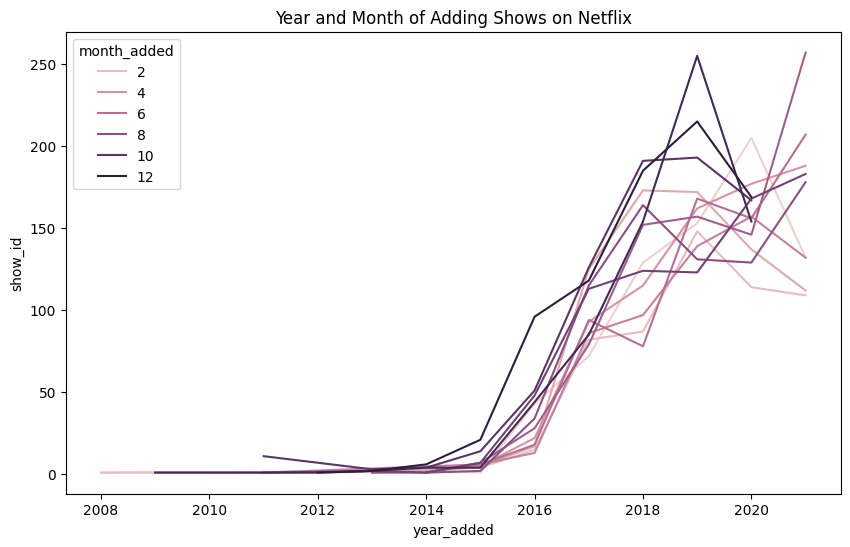

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'year_added', y = 'show_id', hue='month_added')
plt.title('Year and Month of Adding Shows on Netflix')

5.8 Which countries are adding more number of content over the time?

In [ ]:
country_list = country_tb.country.value_counts().head(12).index
top_12_country = country_tb.loc[country_tb['country'].isin(country_list)]
country_year = top_12_country.merge(df , on = 'show_id')[['show_id','country_x' ,'type_x' , 'year_added' ]]
country_year.columns = ['show_id', 'country', 'type', 'year_added']

In [ ]:
country_year = country_year.groupby(['country' , 'year_added'])['show_id'].count().reset_index()

<Axes: xlabel='year_added', ylabel='show_id'>

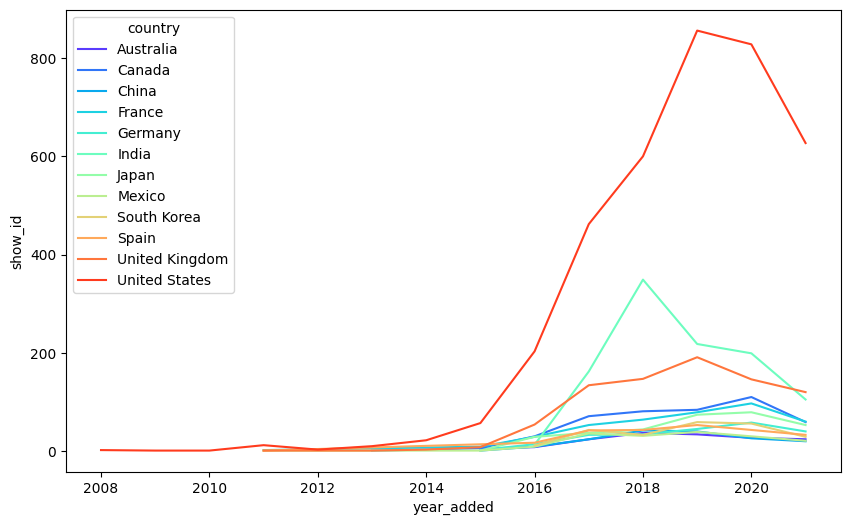

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(data = country_year , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

United Stated have always added highset number of movies/TV shows over the time. Since 2016, India has seen spike in popularity of content and added more number of content, followed by United Kingdom at 3rd position.

# **Insights based on Non-Graphical and Visual Analysis**

***Content Distribution and Growth:***

Netflix offers a library consisting primarily of movies, with TV shows making up a significant secondary portion.
The platform's content library has grown considerably since its launch in 2008, with a substantial increase observed around 2015.
While there might have been fluctuations in content addition recently (possibly due to external factors), the overall trend indicates continuous growth.

***Shifting Content Focus:***

There seems to be a growing preference for TV shows on Netflix, potentially reflecting changing viewer habits.
This trend is evident in the potential surpassing of movie content by TV shows in recent times.

***Content Variety and Availability:***

Netflix boasts a diverse selection of movies from a wide range of directors across numerous countries.
The platform caters to various audience segments by offering content with different maturity ratings.
The availability of content with specific ratings may vary by region, with some genres potentially more prominent in certain countries.

***Content Length and Popular Genres:***

Movie durations typically fall within a specific range, with outliers possible.
Similarly, TV shows often have a limited number of seasons, although exceptions might exist.
International content, dramas, and comedies appear to be popular genres across both movies and TV shows on Netflix.

**Actor Representation and Genre Trends:**

Actors from a particular region (potentially India in your case) seem to be well-represented in the movie library.
There might be a trend towards shorter movie durations in recent years.
It's also interesting to note the potential presence of popular genres specific to certain countries.

# **Business Insights**


Netflix have majority of content which is released after the year 2000. It is observed that the content older than year 2000 is very scarce on Netflix. Senior Citizen could be the target audience for such content, which is almost missing currently.

Maximum content (more than 80%) is


*   TV-MA - Content intended for mature audiences aged 17 and above.
*   TV-14 - Content suitable for viewers aged 14 and above.
*   TV-PG - Parental guidance suggested (similar ratings - PG-13 , PG)
*   R - Restricted Content, that may not be suitable for viewers under age 17.

These ratings movies target Matured and Adult audience. Rest 20 % of the content is for kids aged below 13. It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.

Most popular genres on Netflix are International Movies and TV Shows , Dramas , Comedies, Action & Adventure, Children & Family Movies, Thrillers.
Maximum content of Netflix which is around 75% , is coming from the top 10 countries. Rest of the world only contributes 25% of the content. More countries can be focussed in future to grow the business.
Liking towards the shorter duration content is on the rise. (duration 75 to 150 minutes and seasons 1 to 3) This can be considered while production of new content on Netflix.
drop in content is seen across all the countries and type of content in year 2020 and 2021, possibly because of Pandemic.

# **Recommendations**



*   Very limited genres are focussed in most of the countries except US. It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region. eg. Indian Mythological content is highly popular. We can create such more country specific genres and It might also be liked acorss the world just like Japanese Anime.
*   Country specific insights - The content need to be targetting the demographic
of any country. Netflix can produce higher number of content in the perticular rating as per demographic of the country Eg.
The country like India , which is highly populous , has maximum content available only in three rating TV-MA, TV-14 , TV-PG. It is unlikely to serve below 14 age and above 35 year age group






In [ ]:
!jupyter nbconvert --to html /content/Netflix_Case_Study.ipynb

[NbConvertApp] Converting notebook /content/Netflix_Case_Study.ipynb to html
[NbConvertApp] Writing 2353741 bytes to /content/Netflix_Case_Study.html
